In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ujjwalsharma72","key":"98a037e261e3febbb6f60b9c9070ae47"}'}

In [2]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 235kB 7.0MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.20G/1.21G [00:32<00:00, 29.2MB/s]
100% 1.21G/1.21G [00:32<00:00, 39.9MB/s]


In [0]:
import zipfile
with zipfile.ZipFile("/content/celeba-dataset.zip","r") as zip_ref:
    zip_ref.extractall("/content")
    
with zipfile.ZipFile("/content/img_align_celeba.zip","r") as zip_ref:
    zip_ref.extractall("/content")

In [1]:
import pandas as pd  

data=pd.read_csv('/content/list_attr_celeba.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
image_id               202599 non-null object
5_o_Clock_Shadow       202599 non-null int64
Arched_Eyebrows        202599 non-null int64
Attractive             202599 non-null int64
Bags_Under_Eyes        202599 non-null int64
Bald                   202599 non-null int64
Bangs                  202599 non-null int64
Big_Lips               202599 non-null int64
Big_Nose               202599 non-null int64
Black_Hair             202599 non-null int64
Blond_Hair             202599 non-null int64
Blurry                 202599 non-null int64
Brown_Hair             202599 non-null int64
Bushy_Eyebrows         202599 non-null int64
Chubby                 202599 non-null int64
Double_Chin            202599 non-null int64
Eyeglasses             202599 non-null int64
Goatee                 202599 non-null int64
Gray_Hair              202599 non-null int64
Heavy_Makeup           202599 non

In [0]:
col_list=data.columns.tolist()
col_list.remove('image_id')

In [0]:
import glob
import numpy as np

import os.path as path
from scipy import misc

IMAGE_PATH = '/content/img_align_celeba'
file_paths = glob.glob(path.join(IMAGE_PATH, '00*.jpg'))

images = [misc.imread(path) for path in file_paths]
images = np.asarray(images)

In [4]:
images.shape

(9999, 218, 178, 3)

In [5]:
images=images[:5000]
images.shape

(5000, 218, 178, 3)

In [6]:
n_images = images.shape[0]
labels = []
m=0
for i in range(n_images):
    filename = path.basename(file_paths[i])
    index=int(filename.split(".")[0])
    label_list=[]
    for col in col_list:
      if data[col][index-1]==1:
        label_list.append(col)
    if(len(label_list))>m:
      m=len(label_list)
    labels.append(label_list)
    
m

18

In [7]:
from google.colab import files
files.upload()

{}

In [0]:
import cv2
import sys

def faceDetect(image):
  img=image;
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  haar_face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)
  return faces

In [0]:
face_test_list=[]
test_image_list=[]
test_label_list=[]
for i in range(images.shape[0]):
  faces=faceDetect(images[i])
  if len(faces)>=1 :
    face_test_list.append(faces)
    test_image_list.append(images[i])
    test_label_list.append(labels[i])

In [10]:
images=np.asarray(test_image_list,dtype='uint8')
images.shape

(4721, 218, 178, 3)

In [11]:
labels=test_label_list
len(labels)

4721

In [12]:
faceDet_acc=(images.shape[0]/5000)*100
faceDet_acc

94.42

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
labels = np.array(labels)
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
 
# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

1. 5_o_Clock_Shadow
2. Arched_Eyebrows
3. Attractive
4. Bags_Under_Eyes
5. Bald
6. Bangs
7. Big_Lips
8. Big_Nose
9. Black_Hair
10. Blond_Hair
11. Blurry
12. Brown_Hair
13. Bushy_Eyebrows
14. Chubby
15. Double_Chin
16. Eyeglasses
17. Goatee
18. Gray_Hair
19. Heavy_Makeup
20. High_Cheekbones
21. Male
22. Mouth_Slightly_Open
23. Mustache
24. Narrow_Eyes
25. No_Beard
26. Oval_Face
27. Pale_Skin
28. Pointy_Nose
29. Receding_Hairline
30. Rosy_Cheeks
31. Sideburns
32. Smiling
33. Straight_Hair
34. Wavy_Hair
35. Wearing_Earrings
36. Wearing_Hat
37. Wearing_Lipstick
38. Wearing_Necklace
39. Wearing_Necktie
40. Young


In [14]:
labels.shape

(4721, 40)

In [0]:
X_test=images/255
y_test=labels

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1nmNXvCLx6Hi2Gq0x7_3ZIHAGAD-Xo7K_'})
download.GetContentFile('model_weights.hdf5')

In [0]:
download = drive.CreateFile({'id': '1UOYgZ5GdtxoxTIpdNSVMt4XqdX45kCr6'})
download.GetContentFile('model.json')

In [16]:
!ls

adc.json			     list_bbox_celeba.csv
celeba-dataset.zip		     list_eval_partition.csv
haarcascade_frontalface_default.xml  list_landmarks_align_celeba.csv
img_align_celeba		     model.json
img_align_celeba.zip		     model_weights.hdf5
kaggle.json			     sample_data
list_attr_celeba.csv


In [0]:
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()



In [18]:
from keras.models import model_from_json
model = model_from_json(loaded_model_json)

model.load_weights("model_weights.hdf5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [19]:
preds=model.predict(X_test)
preds

array([[9.35588852e-02, 2.22279057e-01, 2.38370210e-01, ...,
        1.16070405e-01, 9.66078602e-03, 8.90773833e-01],
       [4.29310538e-02, 1.42932937e-01, 2.56178260e-01, ...,
        2.39335727e-02, 3.26831117e-02, 6.68510675e-01],
       [3.19069982e-01, 4.66473587e-02, 1.73441648e-01, ...,
        5.64880222e-02, 2.20911037e-02, 7.63708115e-01],
       ...,
       [8.61639529e-03, 4.89062637e-01, 6.63751900e-01, ...,
        1.56978041e-01, 3.19238123e-03, 9.46534812e-01],
       [1.75853085e-03, 6.78526580e-01, 9.64423120e-01, ...,
        3.22064638e-01, 2.59140215e-04, 9.69866812e-01],
       [5.36471158e-02, 4.30391803e-02, 1.32026002e-01, ...,
        6.55836239e-02, 4.23677415e-02, 6.08471036e-01]], dtype=float32)

In [20]:
percent=preds*100
percent

array([[9.35588837e+00, 2.22279053e+01, 2.38370209e+01, ...,
        1.16070404e+01, 9.66078579e-01, 8.90773849e+01],
       [4.29310560e+00, 1.42932940e+01, 2.56178265e+01, ...,
        2.39335728e+00, 3.26831126e+00, 6.68510666e+01],
       [3.19069977e+01, 4.66473579e+00, 1.73441658e+01, ...,
        5.64880228e+00, 2.20911026e+00, 7.63708115e+01],
       ...,
       [8.61639500e-01, 4.89062653e+01, 6.63751907e+01, ...,
        1.56978045e+01, 3.19238126e-01, 9.46534805e+01],
       [1.75853088e-01, 6.78526611e+01, 9.64423141e+01, ...,
        3.22064629e+01, 2.59140208e-02, 9.69866791e+01],
       [5.36471176e+00, 4.30391788e+00, 1.32026005e+01, ...,
        6.55836248e+00, 4.23677397e+00, 6.08471031e+01]], dtype=float32)

In [21]:
preds=np.round(preds, 2)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0
score=np.sum(preds==y_test)/(preds==y_test).size
print("Correct Predictions:",np.sum(preds==y_test))
print("Total Predictions:",(preds==y_test).size)
print("Accuracy:",score*100)

Correct Predictions: 165249
Total Predictions: 188840
Accuracy: 87.50741368354163


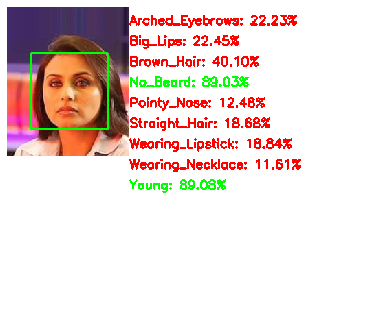

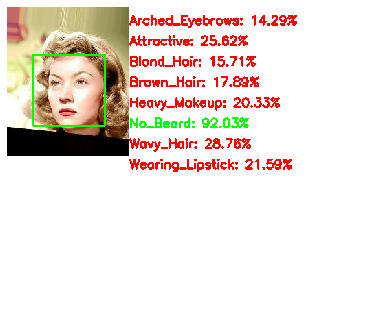

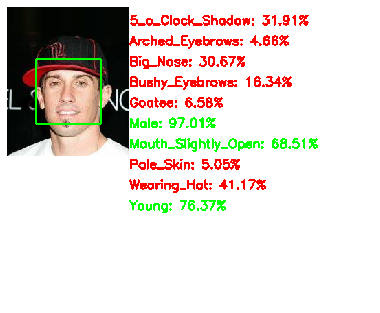

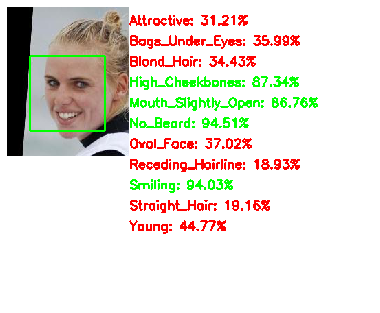

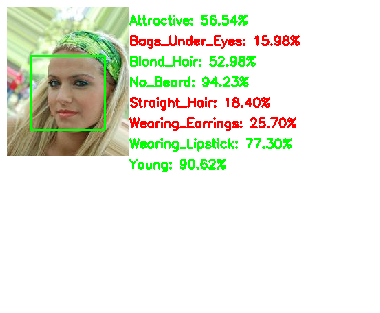

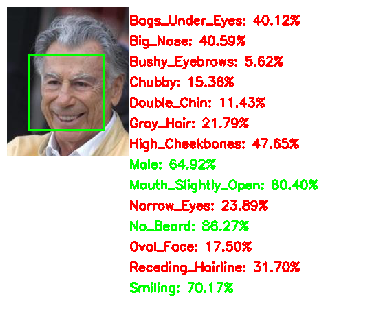

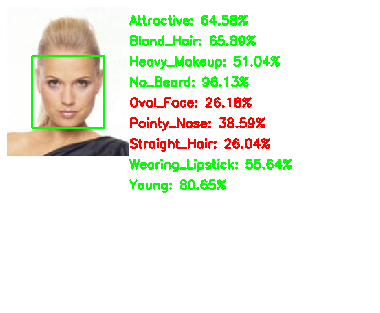

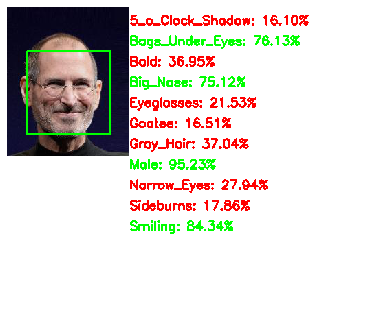

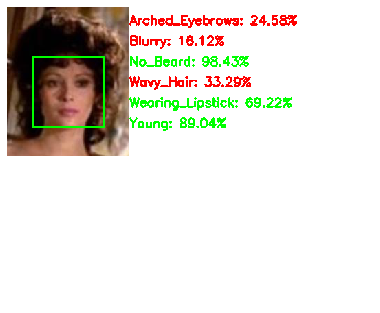

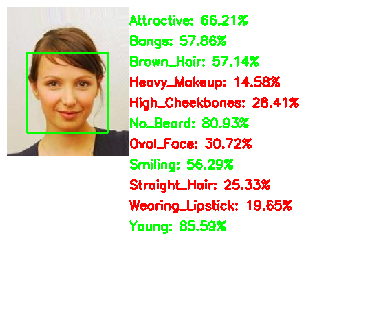

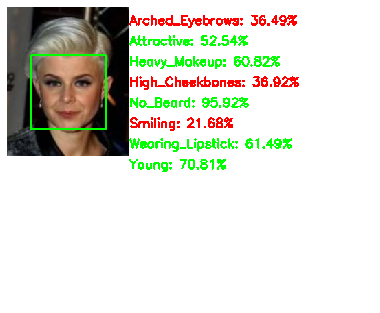

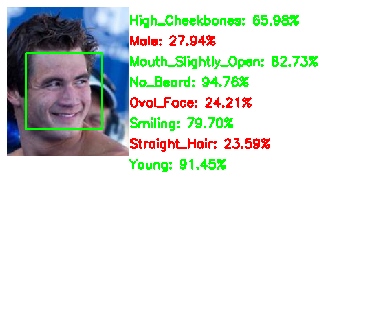

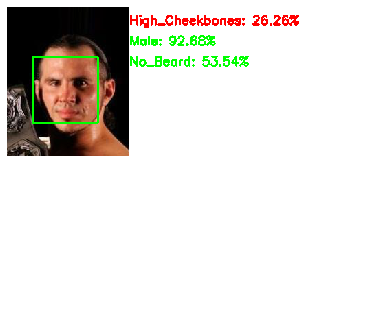

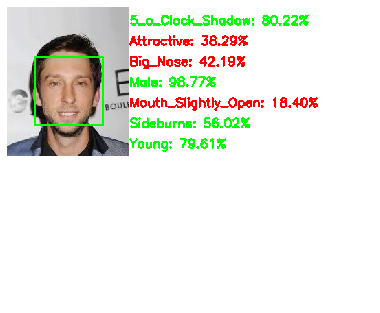

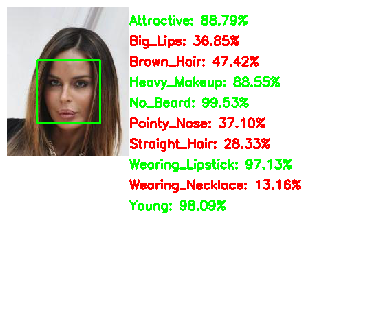

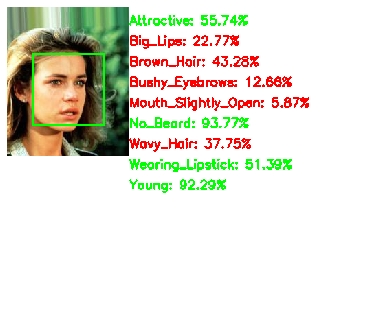

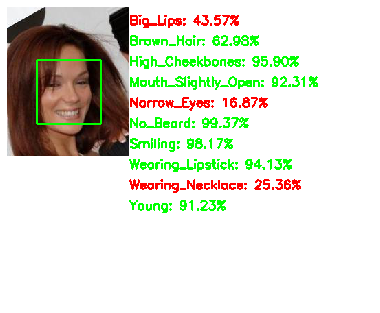

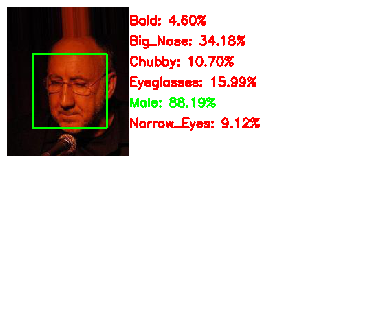

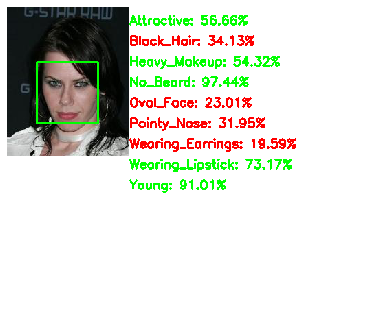

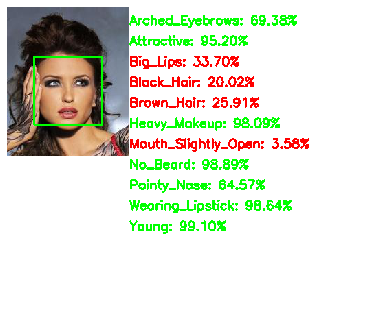

In [32]:
import  matplotlib.pyplot  as plt
            
for i in range(20):
  for (x, y, w, h) in face_test_list[i]:
    cv2.rectangle(images[i], (x, y), (x+w, y+h), (0, 255, 0), 2)
  img = np.zeros([218,356,3],dtype=np.uint8)
  img.fill(255)
  img_merge = np.hstack( (images[i],img) )
  img = np.zeros([218,356+178,3],dtype=np.uint8)
  img.fill(255)

  img_merge = np.vstack( (img_merge,img) )
  k=0
  for j in range(40):
    if y_test[i][j]==0:
      continue
    if percent[i][j]>=50:
      color=(0,255,0)
    else:
      color=(255,0,0)
    lab = "{}: {:.2f}%".format(col_list[j], percent[i][j])
    
	  
    cv2.putText(img_merge,lab,(178, (k * 30) + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.6,color,2,2)

    k=k+1
  
  plt.imshow(img_merge)
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()
  print("\n\n")
  

In [51]:
c="Young"

0
